[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/How-to-Learn-to-Code/python-class/blob/master/Lesson_7_Plotting/plotting_teacher.ipynb)


# Plotting in Python
By the end of the lesson you will learn how to make simple plots using the matplotlib library

## Learning objectives
1. Basics of plotting
2. How to scale and color
3. Different types of plots
    - Scatter plots
    - Boxplots
    - Histograms
4. matplotlib axes
 
We're going to use matplotlib to accomplish these learning objectives

### What is matplotlib?

Matplotlib is a Python library used for visualizing data. The website: https://matplotlib.org/stable/users/index has a helpful user guide that contains documentation, information on how to get started (including package installation), an overview of plot types included in the library, and tutorials. If you are stuck or need help figuring out how to make the plot you have in mind, this website is a great place to start.

Most of the functions that people use from the matplotlib library are in the ```pyplot``` submodule and to make it easier to access those functions, it is usually imported as ```plt```. 

In [58]:
import matplotlib.pyplot as plt

To start plotting, first let's create a vector containing values from 0 to 100:

In [59]:
import numpy as np
x = np.arange(0, 100)

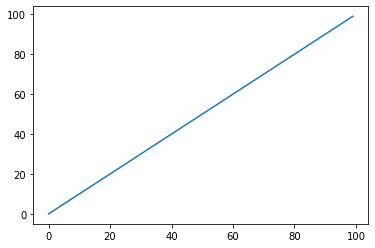

In [60]:
plt.plot(x) #use plot to plot our values
plt.show() #to show the plot in the notebook

It assumed our single data list to be the y-values and in the absence of an x-values list, [0, 1, 2, 3, ... 100] was used instead

In [61]:
y = np.arange(0, 1, 0.01)

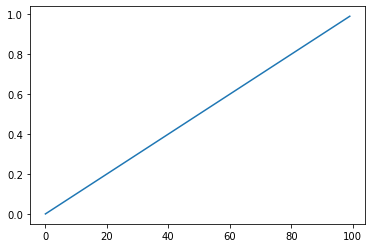

In [62]:
plt.plot(x, y)
plt.show()

Now we are passing in two lists to ```plt.plot```, which explicitly sets the x-values

NOTE: when you pass in two lists to ```plt.plot```, their lengths must match. Here, our lists both contain 100 values

In [63]:
y1 = np.arange(0, 1, 0.01)
y2 = np.arange(2, 3, 0.01)

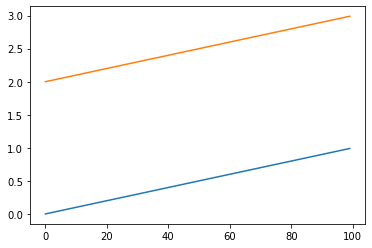

In [64]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

You can plot multiple curves on the same plot, but they have to be all the same length

Right now, it's hard to tell by glancing which line belongs to which data. We can add labels and show a legend to make it easier to tell them apart

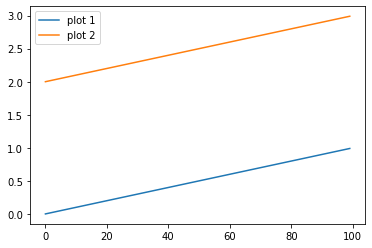

In [65]:
plt.plot(x, y1, label="plot 1")
plt.plot(x, y2, label="plot 2")
plt.legend()
plt.show()

We can also add labels to the axes and a title

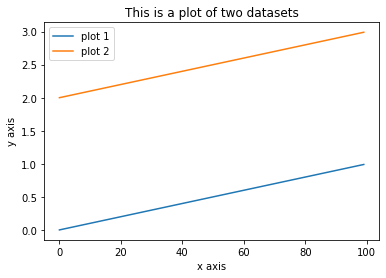

In [66]:
plt.plot(x, y1, label="plot 1")
plt.plot(x, y2, label="plot 2")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("This is a plot of two datasets")
plt.legend()
plt.show()

You can also change the line type (using ```linestyle```) and color (using ```color```)

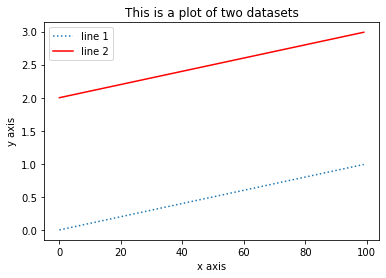

In [67]:
plt.plot(x, y1, linestyle=":", label="line 1") #include linestyle to change the appearance of the line
plt.plot(x, y2, color="red", label="line 2") #include color to change the line's color
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("This is a plot of two datasets")
plt.legend()
plt.show()

You can change the scaling of either axis by using either ```xlim``` or ```ylim```

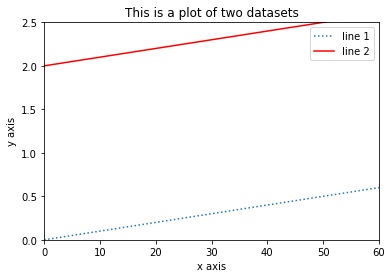

In [68]:
plt.plot(x, y1, linestyle=":", label="line 1")
plt.plot(x, y2, color="red", label="line 2")
plt.xlim(0, 60) #sets the lower and upper bound of the x axis
plt.ylim(0, 2.5) #sets the lower and upper bound of the y axis
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("This is a plot of two datasets")
plt.legend()
plt.show()

You can see that this is the same plot as above, except it's more zoomed in because we changed the axes

## Other types of plots in matplotlib

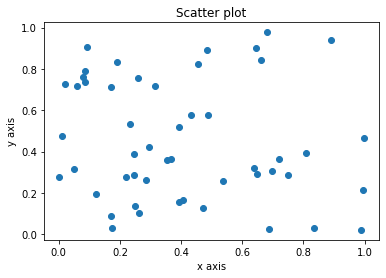

In [69]:
# Scatter plot
x = np.random.rand(50)
y = np.random.rand(50)
plt.scatter(x, y)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Scatter plot")
plt.show()

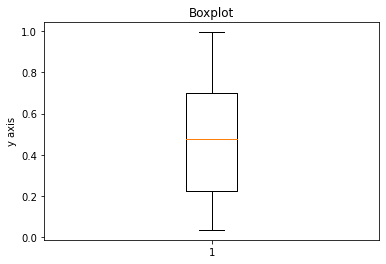

In [70]:
# Boxplot
data = np.random.rand(50)
plt.boxplot(data)
plt.ylabel("y axis")
plt.title("Boxplot")
plt.show()

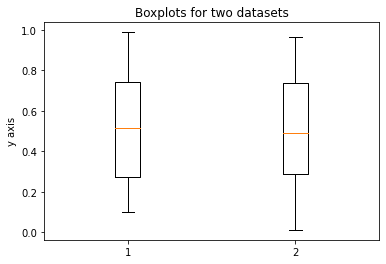

In [71]:
# Multiple boxplots
data1 = np.random.rand(50)
data2 = np.random.rand(50)

# Make a list of the two datasets
data = [data1, data2]
plt.boxplot(data)
plt.ylabel("y axis")
plt.title("Boxplots for two datasets")
plt.show()

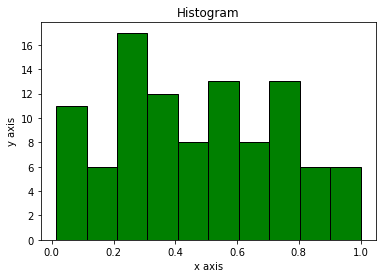

In [72]:
# Histogram
data = np.random.rand(100)
plt.hist(data, bins=10, facecolor='green', edgecolor='black')
#edgecolor outlines the edges of the bars with a certain color
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Histogram")
plt.show()

# Plotting multiple graphs in one figure
In matplotlib, there is a distinction between a "figure" and something called an "axes" object (see image below). The figure contains your plots and can be made up of more than one plot. Each plot is inside of the axes object. In all examples so far we've only had one plot so there was only one axes object inside of each figure. Think of the figure like a sheet of paper. We can draw multiple plots inside of boxes on the paper. The boxes represent the axes object. 
![Representation of the figure structure in matplotlib](matplotlib_figure.png)

Figure from: https://towardsdatascience.com/what-are-the-plt-and-ax-in-matplotlib-exactly-d2cf4bf164a9

In order to create a figure with multiple subplots dynamically, meaning you create the data for each plot at the same time you're plotting, you can use a ```for``` loop:

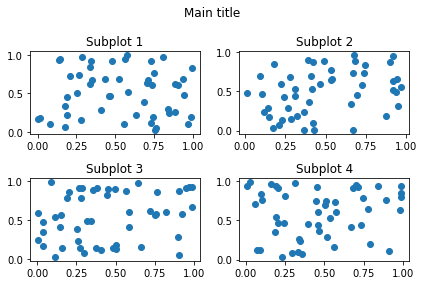

In [73]:
num_rows = 2
num_cols = 2
count = 0

fig, axes = plt.subplots(num_rows, num_cols)
for row_num in range(num_rows):
    for col_num in range(num_cols):
        count += 1
        ax = axes[row_num][col_num]
        ax.scatter(np.random.rand(50), np.random.rand(50))
        ax.set_title(f'Subplot {count}') 
        #set_title is used for an axes object, whereas a plt object uses just title
fig.suptitle('Main title')
fig.tight_layout()
plt.show()

#code adapted from above towardsdatascience link

The above example used iterative plotting to create and plot multiple plots in a ```for``` loop. However, if you have a set of plots already made that you want to include, you can use a different command called ```subplot```. The format is ```plt.subplot(number of rows, number of columns, plot number)```

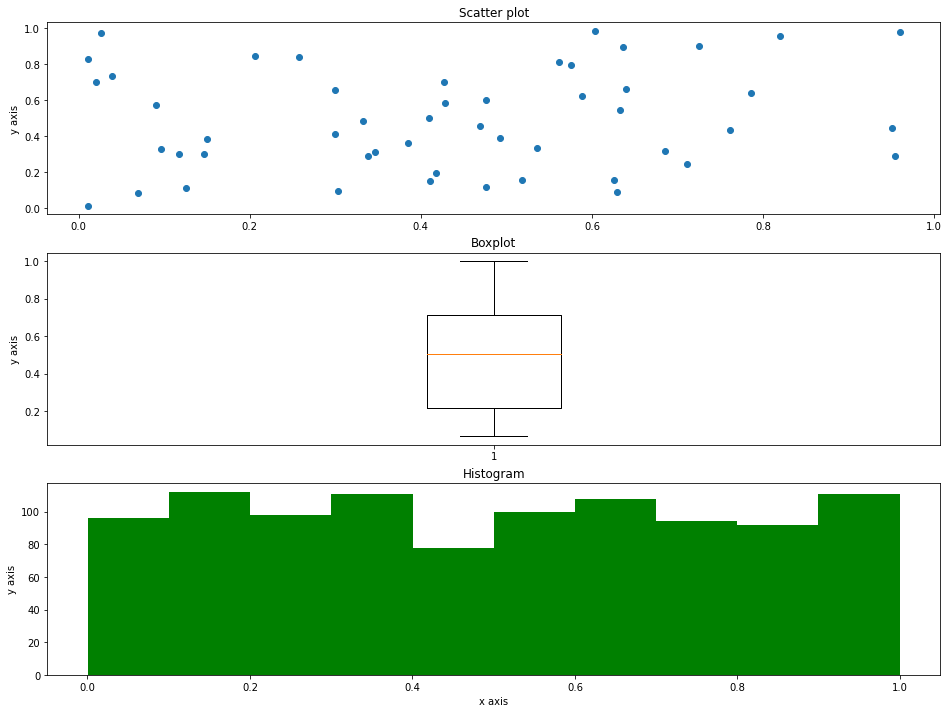

In [74]:
plt.figure(figsize=(16, 12)) #to specify how big the figure should be in order to make it readable
plt.subplot(3, 1, 1)
x = np.random.rand(50)
y = np.random.rand(50)
plt.scatter(x, y)
plt.ylabel("y axis")
plt.title("Scatter plot")

plt.subplot(3, 1, 2)
data = np.random.rand(50)
plt.boxplot(data)
plt.ylabel("y axis")
plt.title("Boxplot")

plt.subplot(3, 1, 3)
data = np.random.rand(1000)
plt.hist(data, bins=10, facecolor='green')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Histogram")

plt.show()

# In class exercise

In [75]:
!pip install wget
import wget

In [51]:
#If running in colab, need to get the IRIS.csv file from github
wget.download('https://raw.githubusercontent.com/How-to-Learn-to-Code/python-class/master/Lesson_7_Plotting/IRIS.csv')

Read in the IRIS.csv dataset from the file you just downloaded

Dataset from: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [52]:
import pandas as pd
iris_info = pd.read_csv('IRIS.csv',sep=',')
iris_info

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Extract the petal_length and petal_width columns

In [76]:
petal_length = iris_info[["petal_length"]]
petal_length

,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4


In [77]:
petal_width = iris_info[["petal_width"]]
petal_width

,petal_width
0,0.2
1,0.2
2,0.2
3,0.2
4,0.2
...,...
145,2.3
146,1.9
147,2.0
148,2.3


Make a scatter plot of petal length vs width

Bonus: color the points based on species. (Hint: the scatter plot function has a c option to specify color)

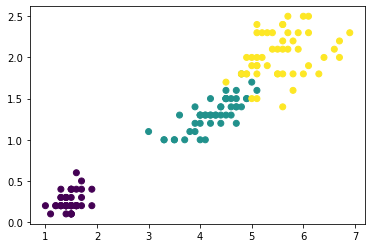

In [78]:
# https://datavizpyr.com/how-to-color-scatterplot-by-a-variable-in-matplotlib/
colors = {'Iris-setosa':'red', 'Iris-versicolor':'yellow', 'Iris-virginica':'blue'}
plt.scatter(petal_length, petal_width, c=iris_info.species.astype('category').cat.codes)
plt.show()

Label the x axis "petal length" and the y axis "petal width"

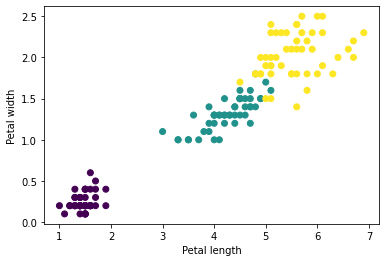

In [79]:
plt.scatter(petal_length, petal_width, c=iris_info.species.astype('category').cat.codes)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

Title the plot as "Iris flower petal length vs width"

If you colored by species, include a legend

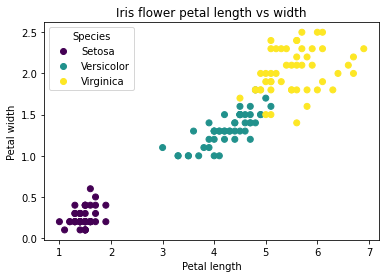

In [80]:
# https://datavizpyr.com/add-legend-to-scatterplot-colored-by-a-variable-with-matplotlib-in-python/

sp_names = ['Setosa', 'Versicolor', 'Virginica']

scatter = plt.scatter(petal_length, petal_width, c=iris_info.species.astype('category').cat.codes)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Iris flower petal length vs width")
plt.legend(handles=scatter.legend_elements()[0],
          labels=sp_names,
          title="Species")
plt.show()